In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = 'cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [5]:
import zlib

# First set of features: Retinal Variables and Primary Medium as dummies

X = data[['va', 'te', 'co', 'or', 'sh']] 
X_pm_d = pd.get_dummies(data['primary_medium']) 

In [6]:
X.head()

,va,te,co,or,sh
0,3,0,0,4,3
1,1,3,0,3,2
2,2,4,4,2,4
3,1,2,0,2,4
4,1,4,1,0,4


# KMeans

In [7]:
from sklearn.cluster import KMeans

# Add Image Features

Second set of features:
I noticed that several images changed color/brightness from one half of an image to the other.
This feature captures that change by clustering different intensities of R, G, and B within both halves of an image.

In [8]:
from skimage import io, transform

imgRecord = []

# location based color
# Do Hist next
for i in range(1, 405):    
    jpg = io.imread("img_small/" + str(i+1) + '_small.jpg')
    # small = transform.resize(jpg, (1,2))
    small = transform.resize(jpg, (1,2))

    # imageVec = small.reshape((small.shape[0] * small.shape[1], 3))
    imageVec = small.reshape(-1)   
    img = imageVec
    imgRecord.append(img)

imgDf = pd.DataFrame.from_records(imgRecord)

Xf = pd.concat([X, imgDf, X_pm_d], axis=1, join_axes=[X.index]) # , X_art_d

X = Xf

/home/ich/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


# Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(Xf)

## plot inertia scores by number of clusters

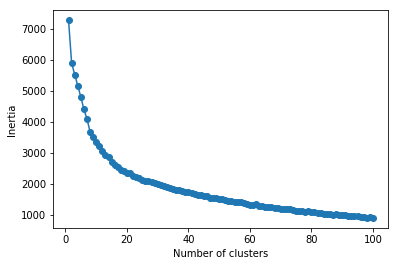

In [10]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [11]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [5,6,7,8,9,10, 11, 12, 13, 14, 15, 17, 18, 20, 25, 30, 35, 38, 40]

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [12]:
# set the number of clusters in the final model
my_n_clusters = 10

In [13]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

For n_clusters = 5 The average silhouette_score is : 0.184588775007


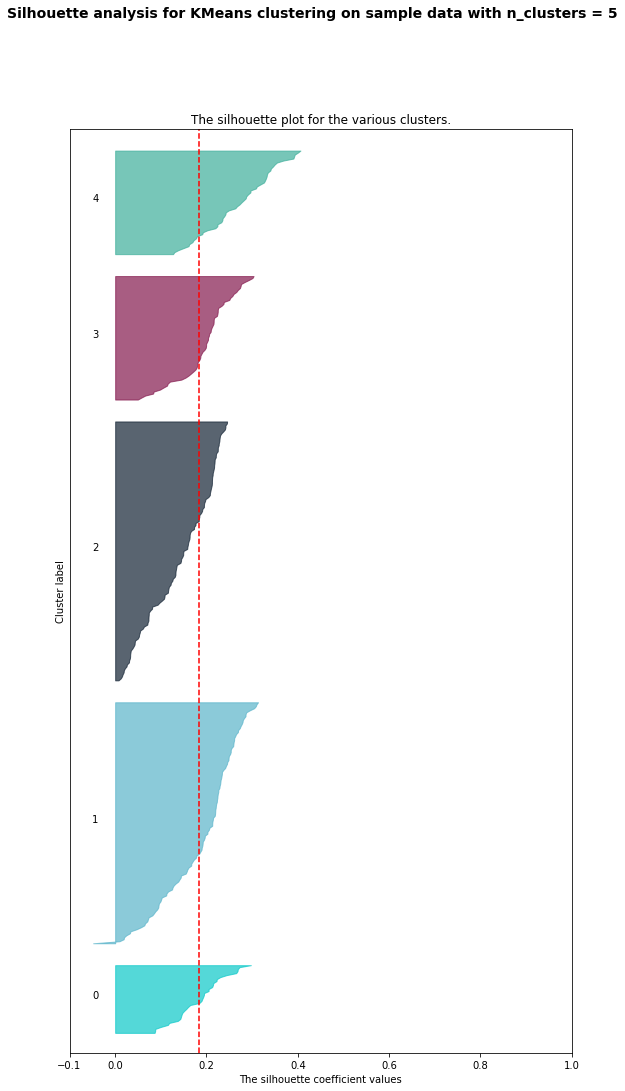

For n_clusters = 6 The average silhouette_score is : 0.195612940808


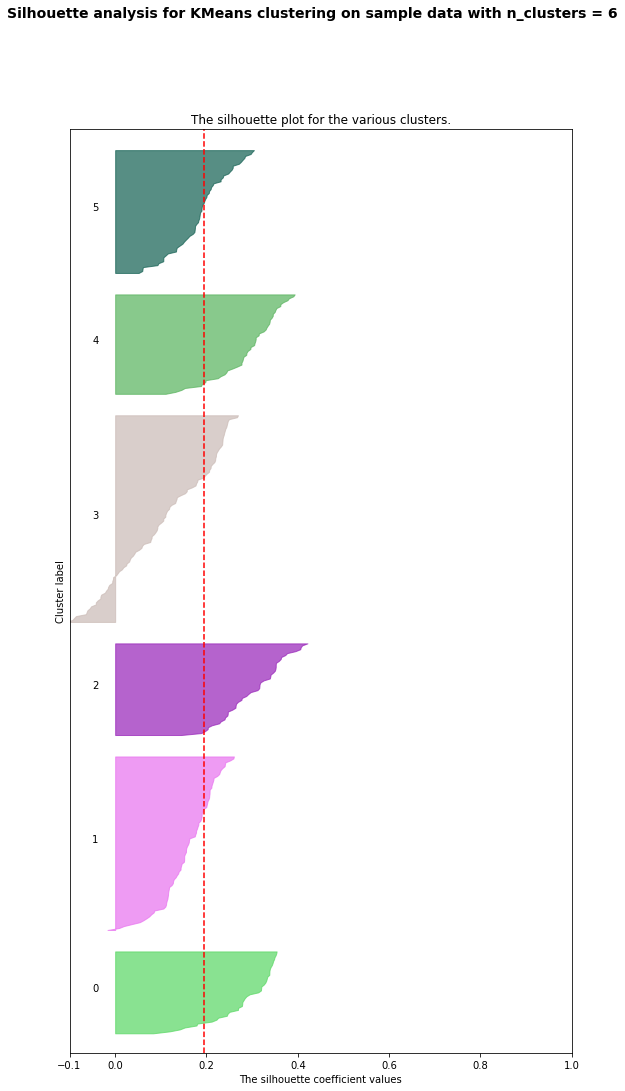

For n_clusters = 7 The average silhouette_score is : 0.203609079899


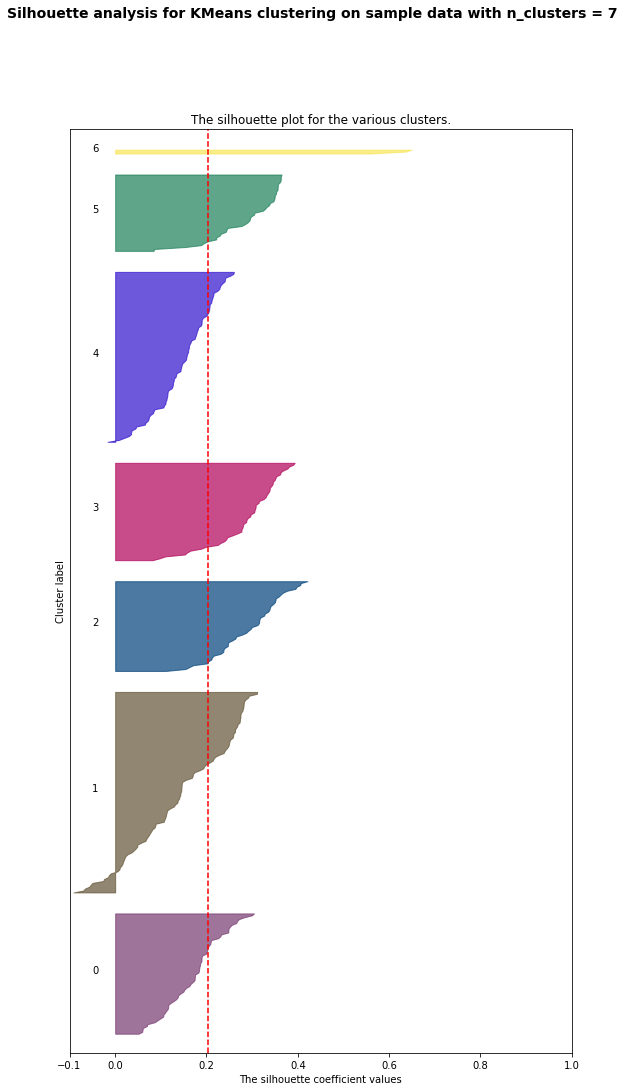

For n_clusters = 8 The average silhouette_score is : 0.217666724691


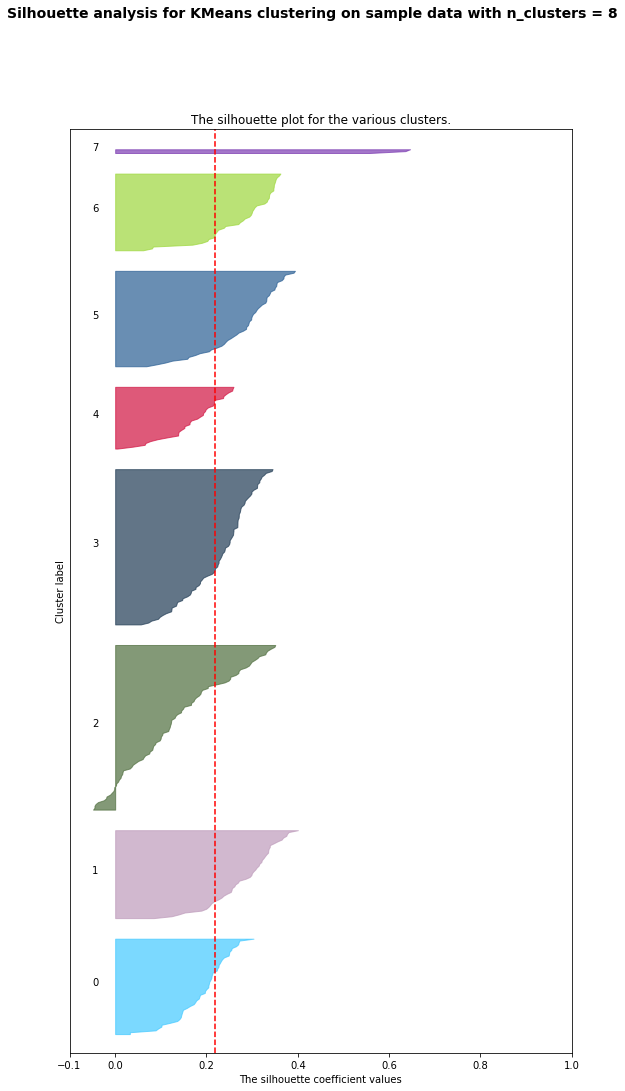

For n_clusters = 9 The average silhouette_score is : 0.196180905971


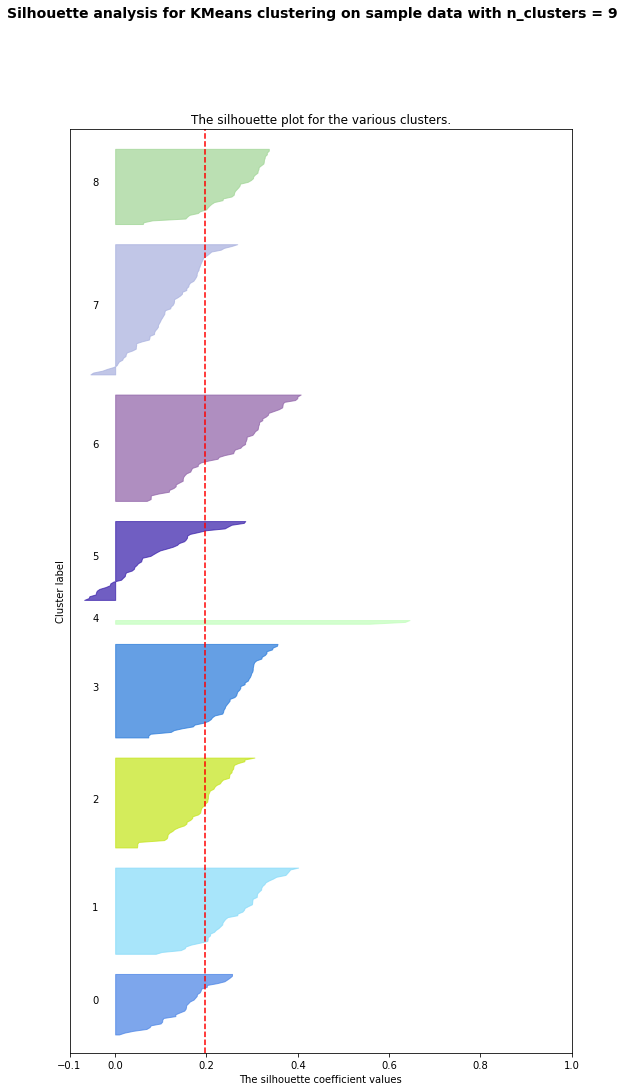

For n_clusters = 10 The average silhouette_score is : 0.20546838668


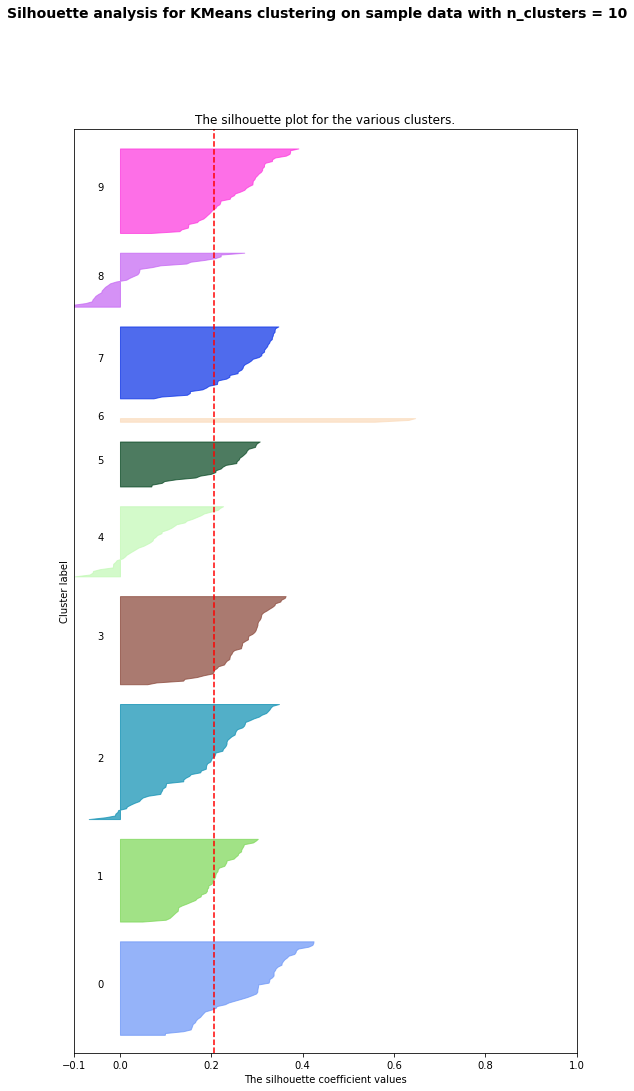

For n_clusters = 11 The average silhouette_score is : 0.222549916753


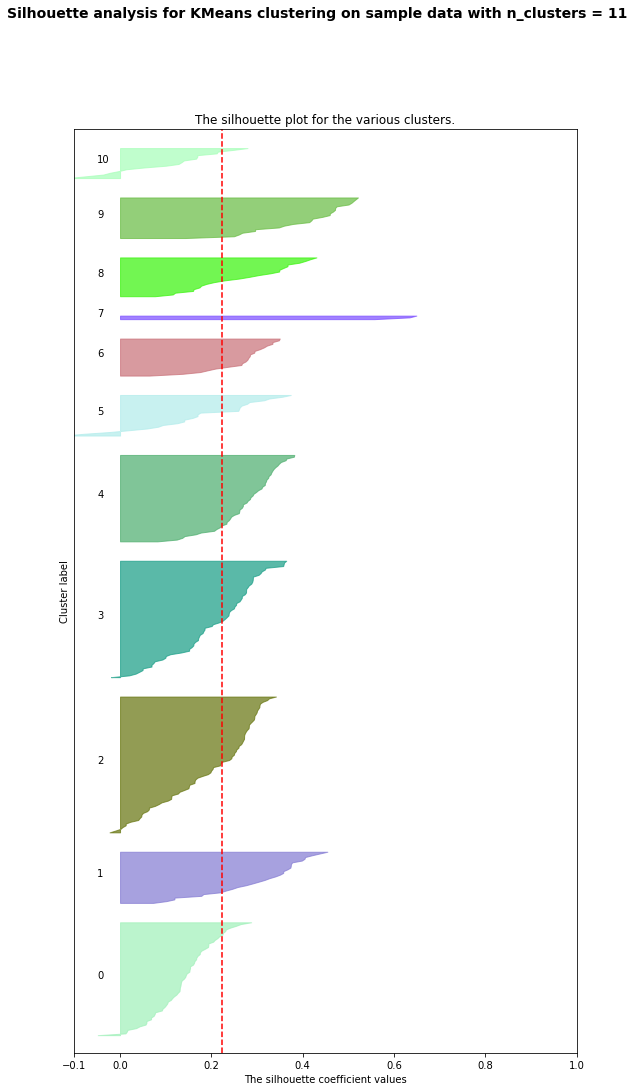

For n_clusters = 12 The average silhouette_score is : 0.200593929835


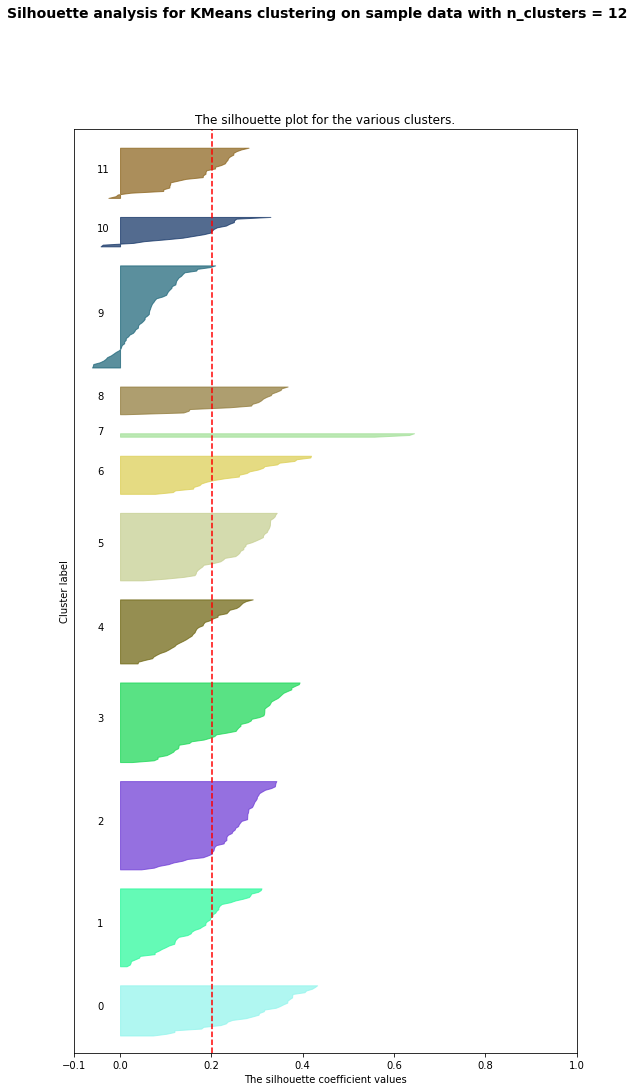

For n_clusters = 13 The average silhouette_score is : 0.21307342127


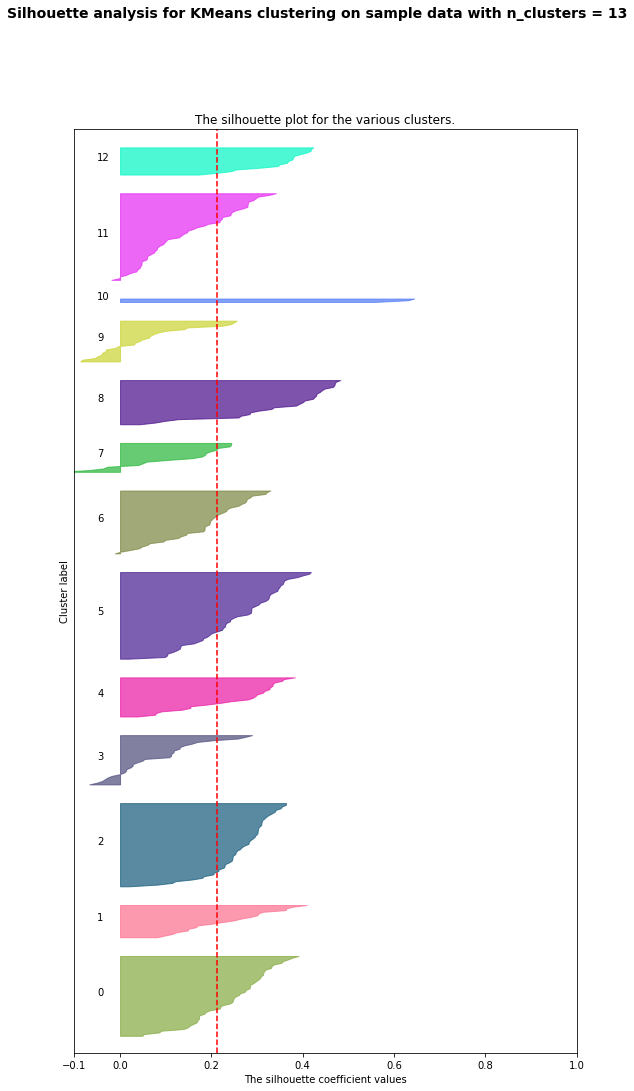

For n_clusters = 14 The average silhouette_score is : 0.214762929747


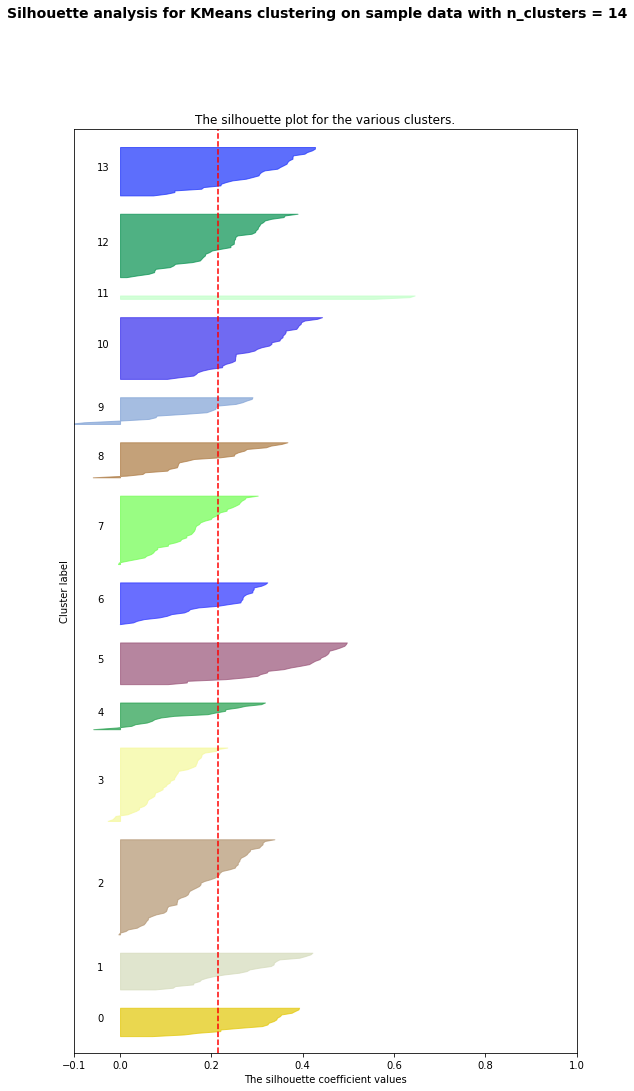

For n_clusters = 15 The average silhouette_score is : 0.214510261098


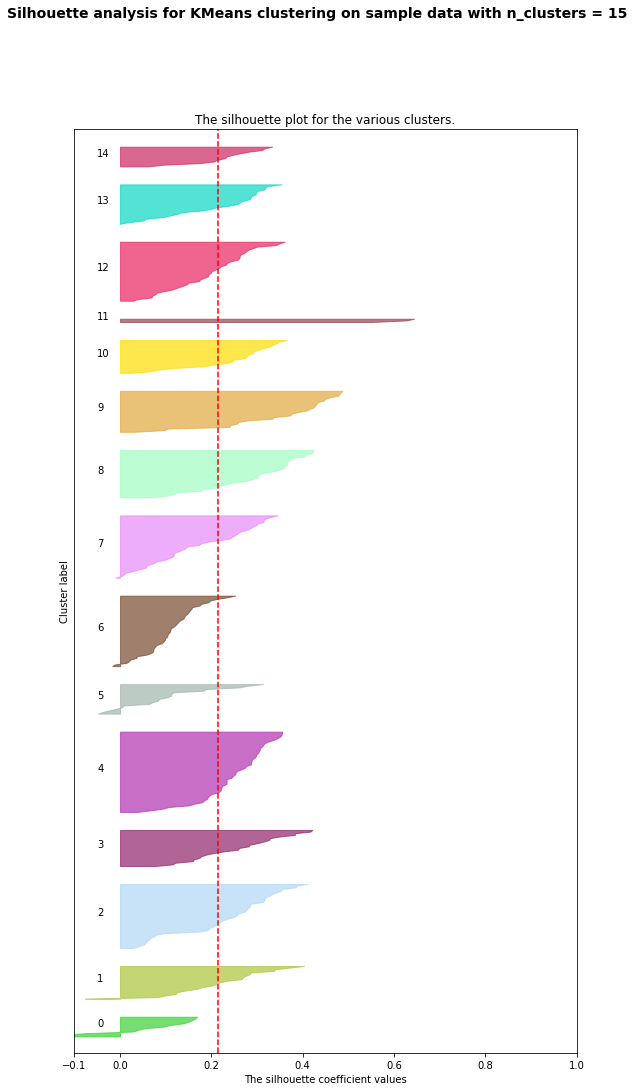

For n_clusters = 17 The average silhouette_score is : 0.209171375287


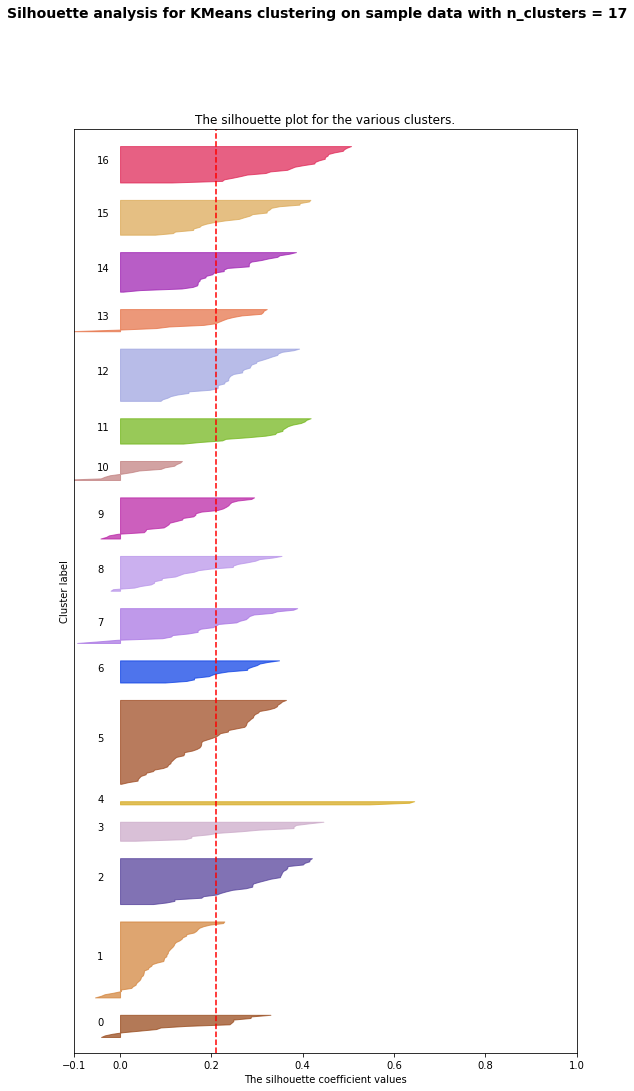

For n_clusters = 18 The average silhouette_score is : 0.20909781406


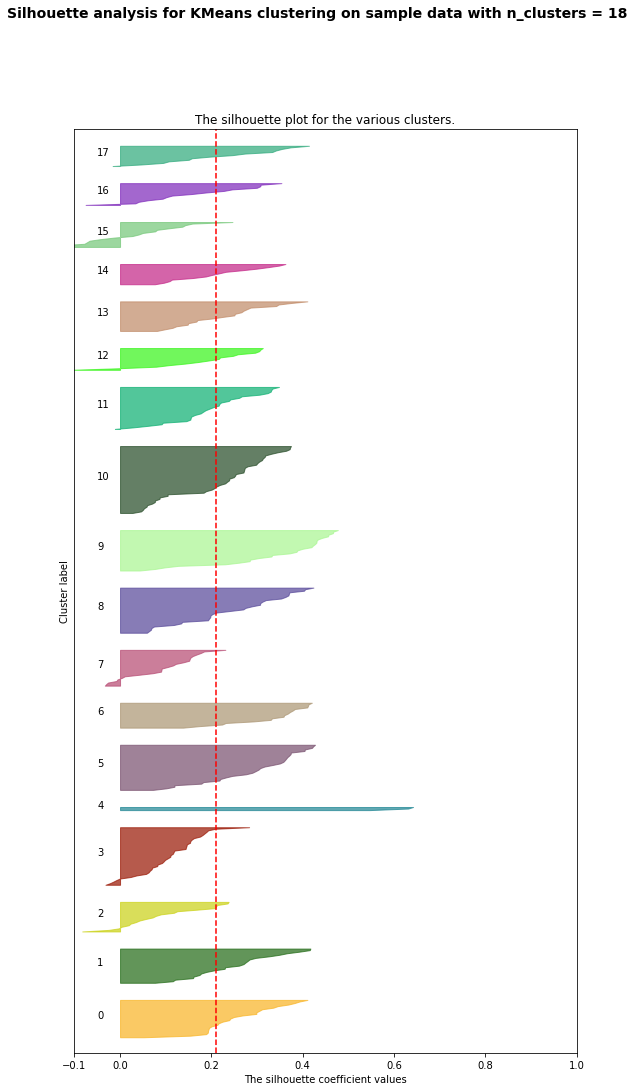

For n_clusters = 20 The average silhouette_score is : 0.205141782633


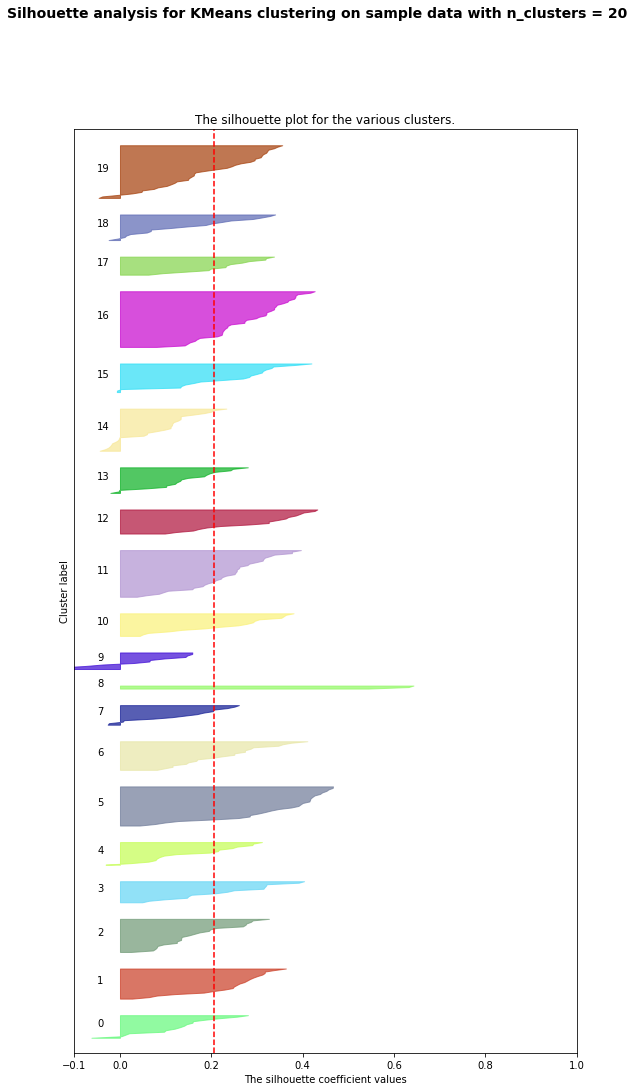

For n_clusters = 25 The average silhouette_score is : 0.184355262818


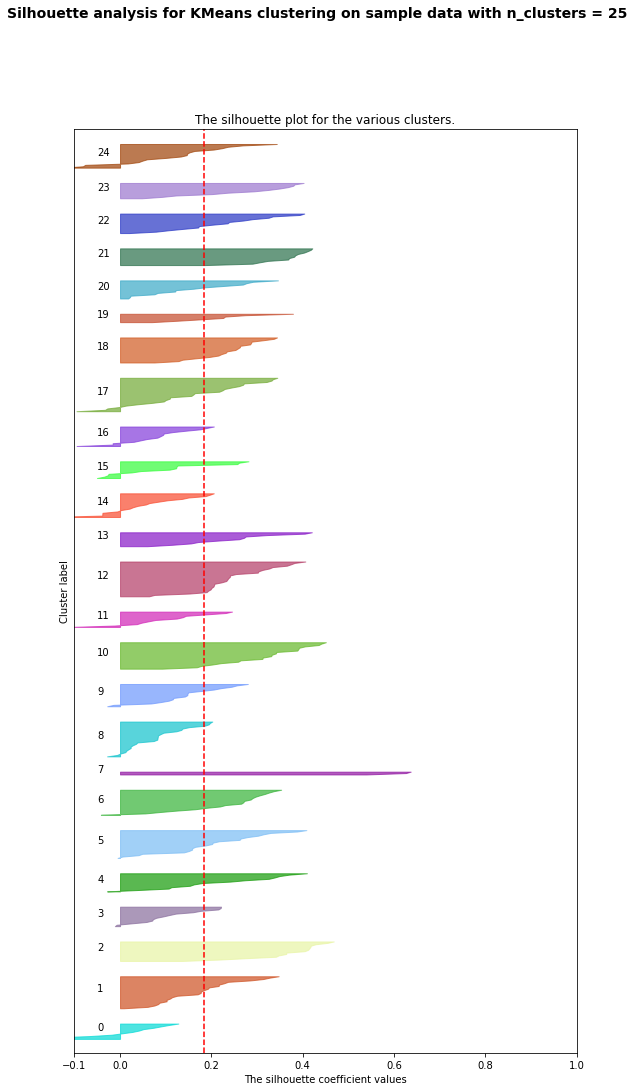

For n_clusters = 30 The average silhouette_score is : 0.179508174053


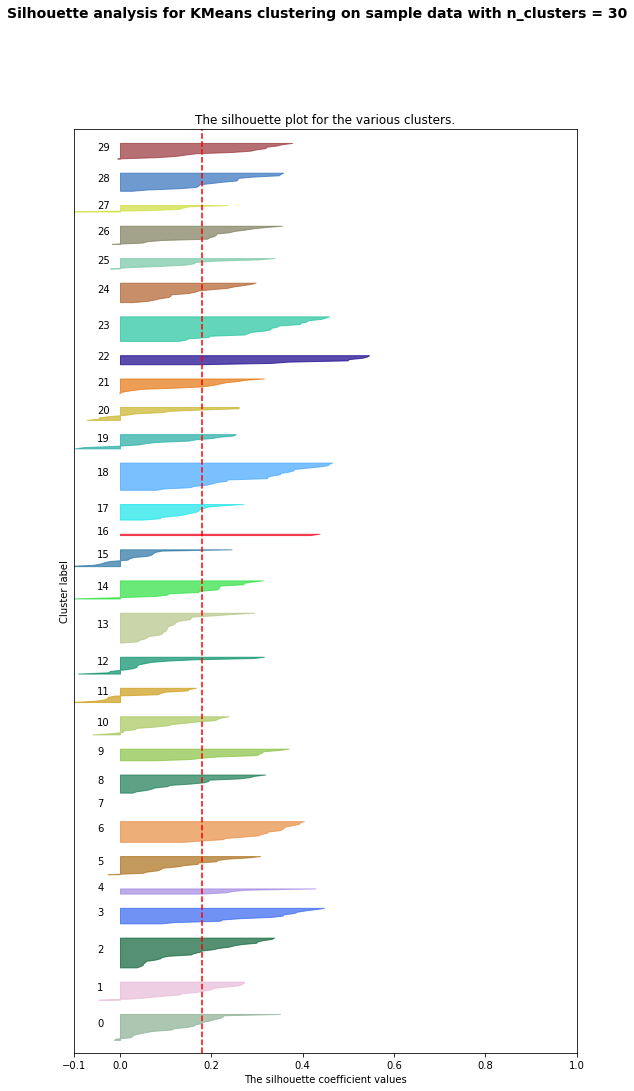

For n_clusters = 35 The average silhouette_score is : 0.177371015181


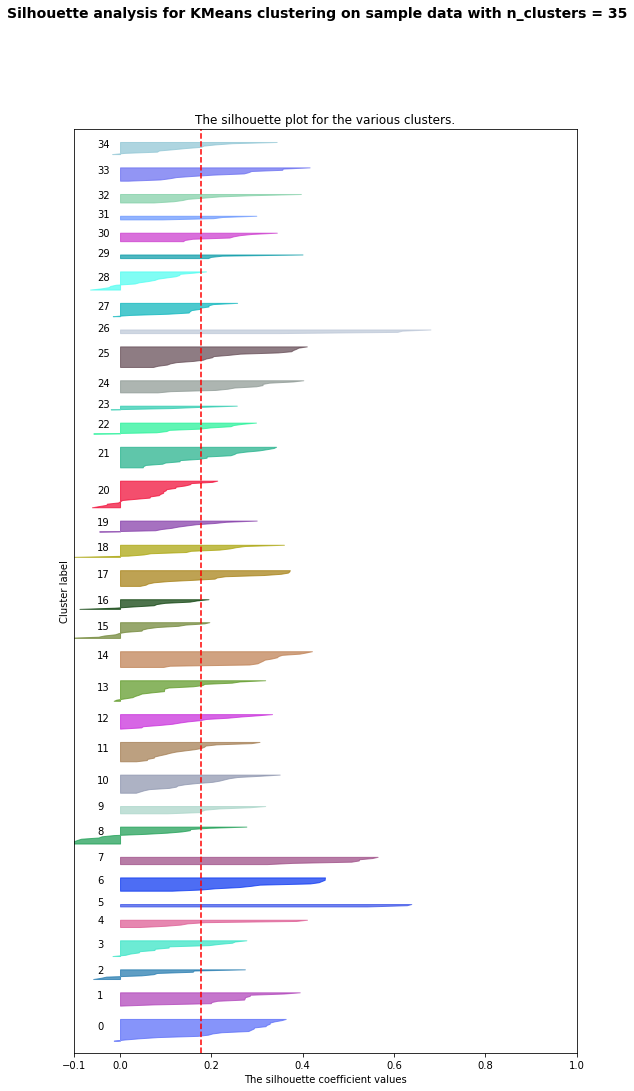

For n_clusters = 38 The average silhouette_score is : 0.175143129578


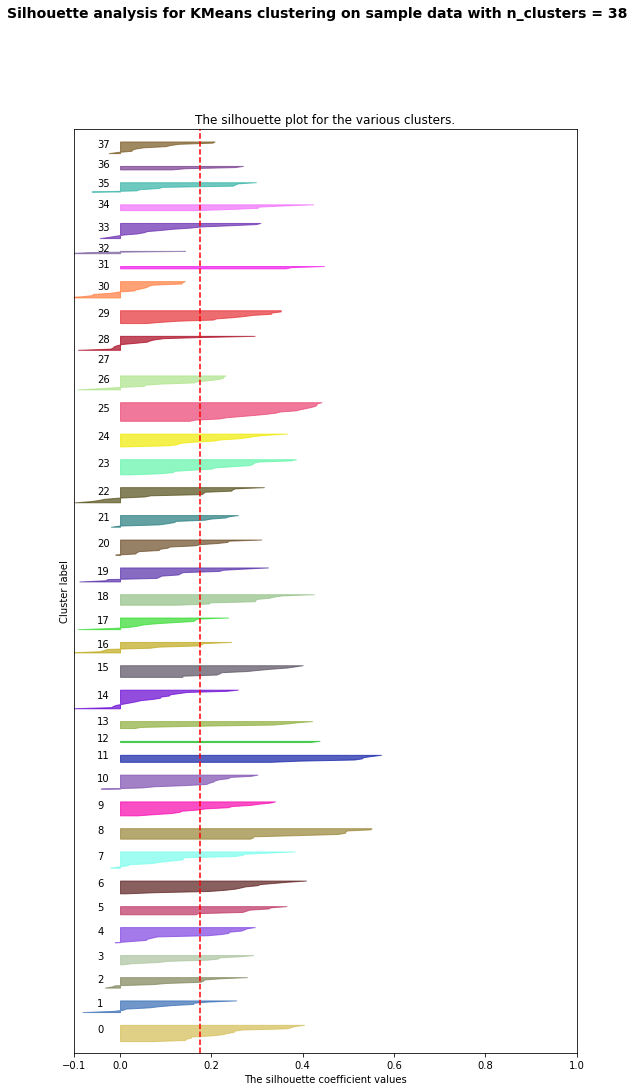

For n_clusters = 40 The average silhouette_score is : 0.182323116327


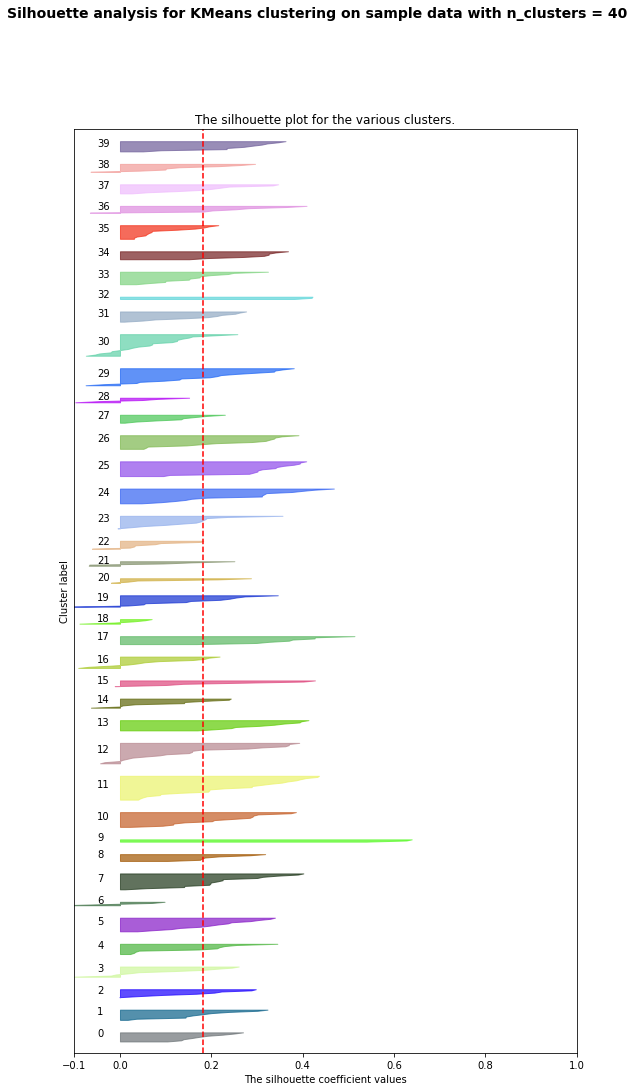

In [14]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [15]:
title = '<br><H1> {} </H1><br>\n'
img = '<img height=100 src={}>\n' 

file = open("cluster.html","w") 

for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    file.write(title.format("Images in cluster: " + str(i)))
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')
            file.write(img.format("img_small/" + str(j+2) + '_small.jpg'))
            
file.close()

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
18_small.jpg
19_small.jpg
28_small.jpg
47_small.jpg
61_small.jpg
67_small.jpg
119_small.jpg
161_small.jpg
173_small.jpg
181_small.jpg
200_small.jpg
225_small.jpg
236_small.jpg
237_small.jpg
244_small.jpg
276_small.jpg
278_small.jpg
279_small.jpg
282_small.jpg
283_small.jpg
284_small.jpg
285_small.jpg
286_small.jpg
289_small.jpg
290_small.jpg
294_small.jpg
296_small.jpg
298_small.jpg
299_small.jpg
302_small.jpg
303_small.jpg
305_small.jpg
308_small.jpg
317_small.jpg
318_small.jpg
331_small.jpg
332_small.jpg
336_small.jpg
338_small.jpg
339_small.jpg
341_small.jpg
347_small.jpg
353_small.jpg
357_small.jpg
368_small.jpg
372_small.jpg
375_small.jpg
379_small.jpg
381_small.jpg
401_small.jpg
402_small.jpg
404_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * *